<strong> Q2. Implement the line search methods<br> ( <font color='maroon'> bisection, </font> <font color='blue'>golden section </font> and <font color='orange'>Armijo rule </font>) 
        on the data set taken for Q1). <br>
    What do you observe on the time taken by the methods and the associated convergence?
<strong>

In [22]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import time

In [23]:
def f(x):
    # Objective function to be minimized
    return np.sin(x)

def gradient_f(x):
    # Gradient of the function
    return np.cos(x)

# Bisection method
def bisection(x, d, alpha=0.1, beta=0.8, tol=0.0000001):
    a, b = 0, 1
    while (b-a) > tol:
        m = (a + b) / 2
        if f(x + m*d) <= (f(x) + alpha * m * np.dot(gradient_f(x), d)):
            a = m
        else:
            b = m
        
    return (a+b) / 2


# Golden section search
def golden_section(x, d, a=0, b=1, tol=0.0000001):
    phi = (1 + np.sqrt(5)) / 2
    rho = 1 / phi
    d1 = rho * b + (1 - rho) * a
    d2 = (1 - rho) * b + rho * a
    while abs(b - a) > tol:
        if f(x + d1*d) < f(x + d2*d):
            b = d2
            d2 = d1
            d1 = rho * b + (1 - rho) * a
        else:
            a = d1
            d1 = d2
            d2 = (1 - rho) * b + rho * a
    return (a+b) / 2

# Armijo rule
def armijo(x, d, alpha=0.1, beta=0.5):
    t = 0.5
    while f(x + t*d) > f(x) + alpha * t * np.dot(gradient_f(x), d):
        t *= beta
    
    return t


# Sample test with random data of 1500 rows and 15 columns
np.random.seed(42)
data = 2*np.random.rand(1500, 1)
x0 = np.mean(data, axis=0)

d = -gradient_f(x0)

import time

start_time = time.time()
step_bisection = bisection(x0, x0)
print("Bisection Step Size:", step_bisection)
print("Bisection Time:", time.time() - start_time)

start_time = time.time()
step_golden = golden_section(x0, d)
print("Golden Section Step Size:", step_golden)
print("Golden Section Time:", time.time() - start_time)

start_time = time.time()
step_armijo = armijo(x0, d)
print("Armijo Step Size:", step_armijo)
print("Armijo Time:", time.time() - start_time)


Bisection Step Size: 2.9802322387695312e-08
Bisection Time: 0.0010006427764892578
Golden Section Step Size: 0.27639318471504276
Golden Section Time: 0.0
Armijo Step Size: 0.5
Armijo Time: 0.0


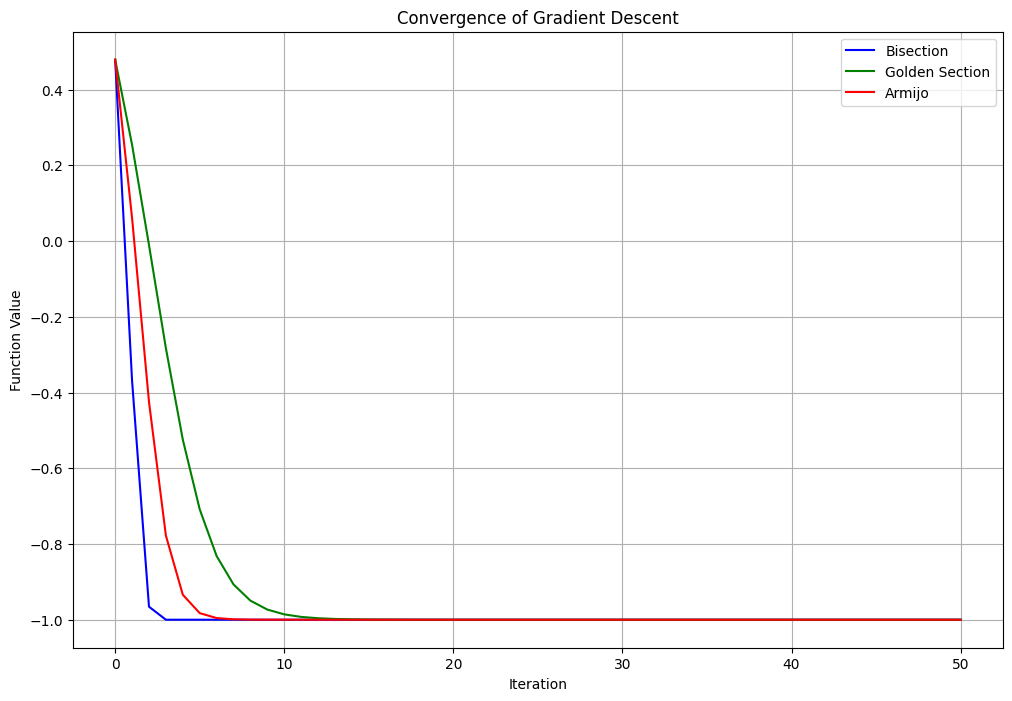

In [24]:
def gradient_descent(x0, line_search, max_iters=50):
    x = x0
    values = [f(x)]

    for i in range(max_iters):
        d = -gradient_f(x)
        step = line_search(x, d)
        x = x + step * d
        values.append(f(x))

    return values

# Generate random data of 1500 rows and 15 columns
np.random.seed(42)
data = np.random.rand(1500, 1)
x0 = np.mean(data, axis=0)

# Run gradient descent with different line search methods
values_bisection = gradient_descent(x0, bisection)
values_golden = gradient_descent(x0, golden_section)
values_armijo = gradient_descent(x0, armijo)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(values_bisection, label="Bisection", color='blue')
plt.plot(values_golden, label="Golden Section", color='green')
plt.plot(values_armijo, label="Armijo", color='red')
plt.xlabel("Iteration")
plt.ylabel("Function Value")
plt.title("Convergence of Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()